Epoch 1, Loss: 0.18853791058063507
Epoch 2, Loss: 0.18765798211097717
Epoch 3, Loss: 0.1867682784795761
Epoch 4, Loss: 0.1858687847852707
Epoch 5, Loss: 0.18495945632457733
Epoch 6, Loss: 0.18404030799865723
Epoch 7, Loss: 0.183111310005188
Epoch 8, Loss: 0.18217241764068604
Epoch 9, Loss: 0.18122366070747375
Epoch 10, Loss: 0.18026503920555115
Epoch 11, Loss: 0.1792965680360794
Epoch 12, Loss: 0.17831823229789734
Epoch 13, Loss: 0.17733009159564972
Epoch 14, Loss: 0.17633214592933655
Epoch 15, Loss: 0.175324484705925
Epoch 16, Loss: 0.174307182431221
Epoch 17, Loss: 0.1732802391052246
Epoch 18, Loss: 0.17224377393722534
Epoch 19, Loss: 0.17119786143302917
Epoch 20, Loss: 0.17014263570308685
Epoch 21, Loss: 0.16907814145088196
Epoch 22, Loss: 0.16800457239151
Epoch 23, Loss: 0.16692201793193817
Epoch 24, Loss: 0.16583065688610077
Epoch 25, Loss: 0.16473066806793213
Epoch 26, Loss: 0.1636222004890442
Epoch 27, Loss: 0.16250547766685486
Epoch 28, Loss: 0.16138069331645966
Epoch 29, Loss:

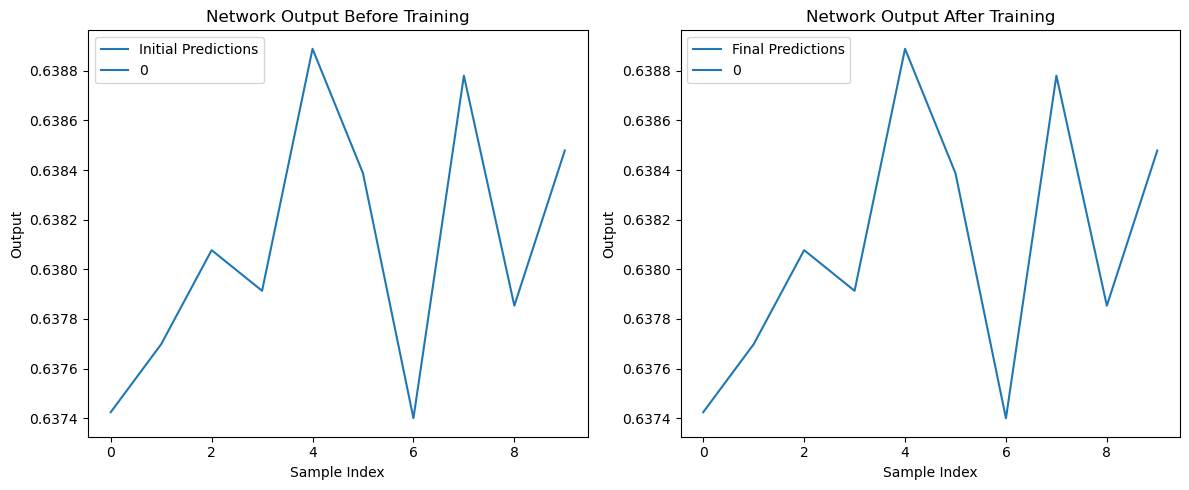

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim  
import matplotlib.pyplot as plt
import seaborn as sns


class SimpleNN(nn.Module):
    def __init__(self):  
        super(SimpleNN, self).__init__()
        self.hidden1 = nn.Linear(3, 3)  
        self.hidden2 = nn.Linear(3, 3)  
        self.hidden3 = nn.Linear(3, 3)  
        self.output = nn.Linear(3, 1)    


        nn.init.uniform_(self.hidden1.weight)
        nn.init.uniform_(self.hidden2.weight)
        nn.init.uniform_(self.hidden3.weight)
        nn.init.uniform_(self.output.weight)

        nn.init.uniform_(self.hidden1.bias)
        nn.init.uniform_(self.hidden2.bias)
        nn.init.uniform_(self.hidden3.bias)
        nn.init.uniform_(self.output.bias)

    def forward(self, x):
        x = torch.sigmoid(self.hidden1(x))
        x = torch.sigmoid(self.hidden2(x))
        x = torch.sigmoid(self.hidden3(x))
        x = torch.tanh(self.output(x))
        return x


input_data = torch.rand(10, 3)  
true_output = torch.rand(10, 1)  


model = SimpleNN()


optimizer = optim.SGD(model.parameters(), lr=0.01)  
criterion = nn.MSELoss()


losses = []
for epoch in range(100):
    model.train()


    predictions = model(input_data)

   
    loss = criterion(predictions, true_output)
    losses.append(loss.item())


    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


model.eval()
initial_predictions = model(input_data).detach().numpy()
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.lineplot(data=initial_predictions, label='Initial Predictions')
plt.title('Network Output Before Training')
plt.xlabel('Sample Index')
plt.ylabel('Output')


final_predictions = model(input_data).detach().numpy()
plt.subplot(1, 2, 2)
sns.lineplot(data=final_predictions, label='Final Predictions', color='orange')
plt.title('Network Output After Training')
plt.xlabel('Sample Index')
plt.ylabel('Output')

plt.tight_layout()
plt.show()
